### k-medoids 算法

In [44]:
import pandas as pd

# 读取数据
data = pd.read_csv('cluster_data.csv')

# 提取特征列
X = data[['Feature 1', 'Feature 2']].values

print("数据形状:", X.shape)
print("前五行数据:\n", X[:5])

数据形状: (500, 2)
前五行数据:
 [[ 2.69858199 -0.67295975]
 [-0.12811326  4.35595241]
 [ 2.50904929  5.7731461 ]
 [-1.51827611  3.44488647]
 [-0.07228289  2.88376939]]


In [45]:
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances

class KMedoids:
    def __init__(self, n_clusters=2, max_iter=100):
        """
        初始化 K-Medoids 算法。
        
        参数：
        - n_clusters: 簇的数量。
        - max_iter: 最大迭代次数。
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.medoids = None
        self.labels_ = None

    def fit(self, X):
        """
        训练 K-Medoids 算法。
        
        参数：
        - X: 输入数据，形状为 (n_samples, n_features)。
        """
        n_samples = X.shape[0]

        # 随机选择初始 medoids
        np.random.seed(42)
        self.medoids = np.random.choice(n_samples, self.n_clusters, replace=False)

        for _ in range(self.max_iter):
            # 计算每个样本到 medoids 的距离，并分配标签
            distances = pairwise_distances(X, X[self.medoids])
            self.labels_ = np.argmin(distances, axis=1)

            # 更新 medoids
            new_medoids = []
            for cluster_idx in range(self.n_clusters):
                cluster_points = np.where(self.labels_ == cluster_idx)[0]
                if len(cluster_points) > 0:
                    # 计算簇内所有点到其他点的距离总和，选择使总和最小的点作为新的 medoid
                    cluster_distances = pairwise_distances(X[cluster_points], X[cluster_points])
                    total_distances = cluster_distances.sum(axis=1)
                    new_medoid_idx = cluster_points[np.argmin(total_distances)]
                    new_medoids.append(new_medoid_idx)

            # 检查收敛条件
            if set(self.medoids) == set(new_medoids):
                break

            self.medoids = new_medoids

    def predict(self, X):
        """
        预测新数据所属的簇。
        
        参数：
        - X: 新数据，形状为 (n_samples, n_features)。
        
        返回：
        - labels: 每个样本所属的簇标签。
        """
        distances = pairwise_distances(X, X[self.medoids])
        return np.argmin(distances, axis=1)

# 使用自定义的 KMedoids
kmedoids = KMedoids(n_clusters=2)
kmedoids.fit(X)

# 输出结果
print("Medoids:", kmedoids.medoids)
print("Labels:", kmedoids.labels_)

Medoids: [418, 61]
Labels: [0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0
 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 

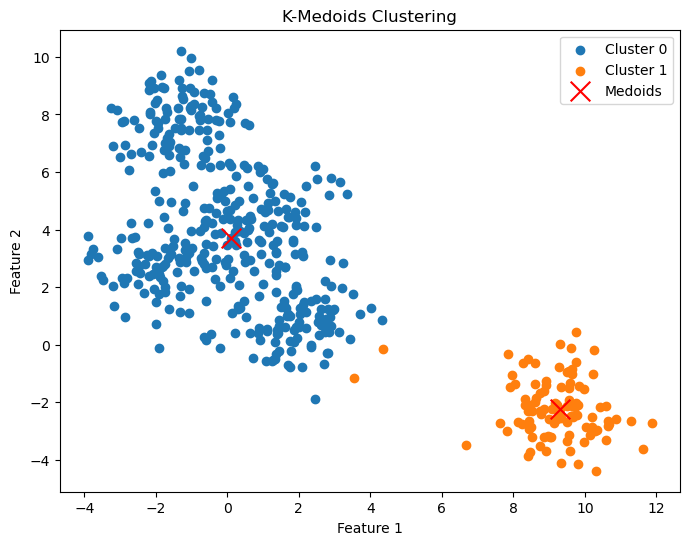

In [46]:
import matplotlib.pyplot as plt

def plot_kmedoids(X, labels, medoids):
    plt.figure(figsize=(8, 6))
    
    # 绘制每个簇的点
    for cluster in range(len(set(labels))):
        cluster_points = X[labels == cluster]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

    # 绘制 medoids
    medoid_points = X[medoids]
    plt.scatter(medoid_points[:, 0], medoid_points[:, 1], s=200, c='red', marker='x', label='Medoids')

    plt.title('K-Medoids Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# 调用绘图函数
plot_kmedoids(X, kmedoids.labels_, kmedoids.medoids)

### OPTICS 算法

Cluster Labels: [-1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  

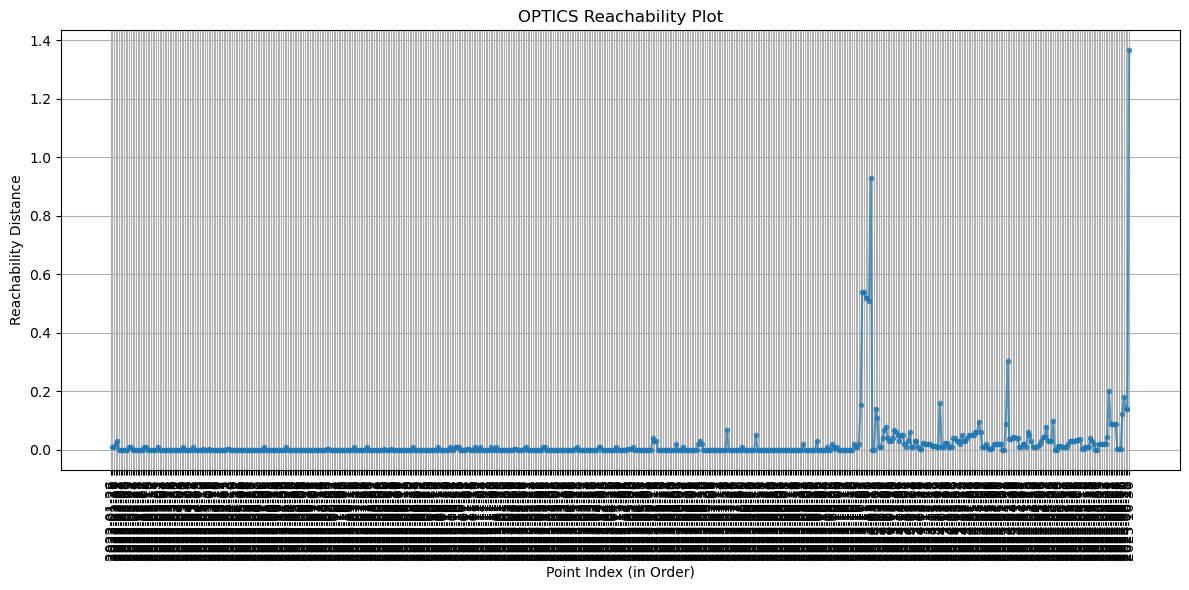

C:\Users\shi\AppData\Local\Temp\ipykernel_30248\1346856275.py:131: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20')


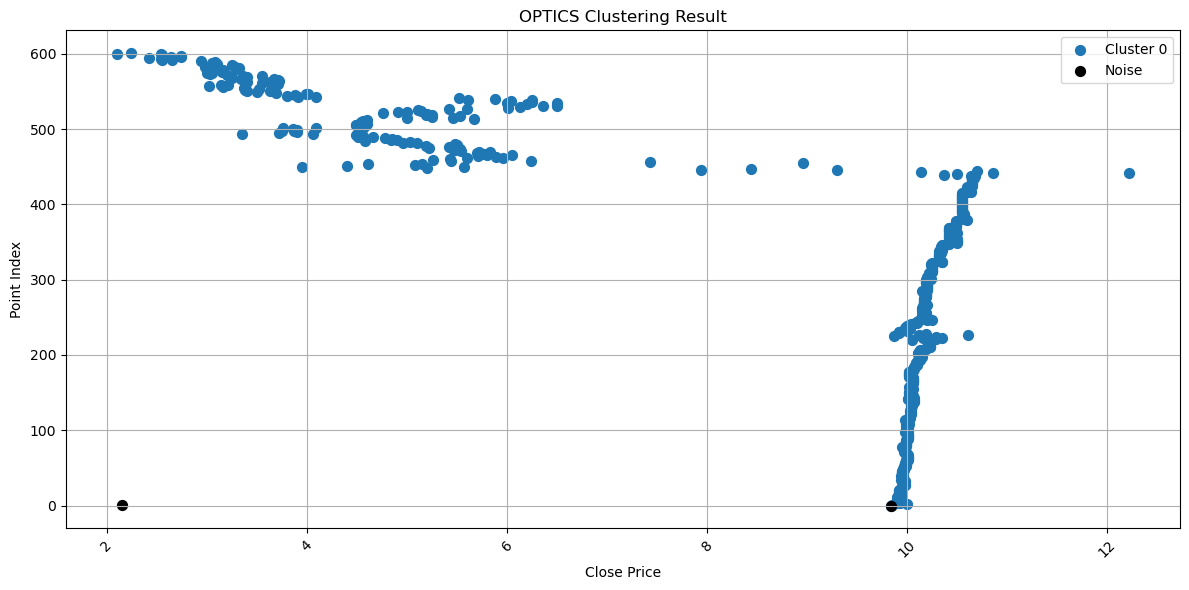

In [3]:
import csv
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read data from CSV file
def read_csv(file_path):
    time, close_prices = [], []
    with open(file_path, mode='r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            time.append(row['time'])
            close_prices.append(float(row['close']))
    return np.array(close_prices).reshape(-1, 1), time

# Step 2: Define OPTICS algorithm
class OPTICS:
    def __init__(self, eps=np.inf, min_samples=5):
        self.eps = eps
        self.min_samples = min_samples
        self.reachability = None
        self.ordering = []

    def fit(self, X):
        n_points = X.shape[0]
        processed = np.zeros(n_points, dtype=bool)
        reachability = np.full(n_points, np.inf)
        ordering = []

        # Compute core distance for each point
        def compute_core_distance(point_idx):
            neighbors = self._get_neighbors(X, point_idx)
            if len(neighbors) < self.min_samples:
                return None
            distances = np.linalg.norm(X[neighbors] - X[point_idx], axis=1)
            return np.sort(distances)[self.min_samples - 1]

        # Get neighbors within epsilon radius
        def get_reachable_neighbors(core_dist, point_idx):
            neighbors = self._get_neighbors(X, point_idx)
            reachable_neighbors = []
            for neighbor in neighbors:
                dist = np.linalg.norm(X[neighbor] - X[point_idx])
                if dist <= self.eps and not processed[neighbor]:
                    reachable_neighbors.append((dist, neighbor))
            return reachable_neighbors

        # Process points using a priority queue
        seeds = []  # Priority queue (min heap)

        def update_seeds(core_dist, neighbors):
            for dist, idx in neighbors:
                new_reachability = max(core_dist, dist)
                if new_reachability < reachability[idx]:
                    reachability[idx] = new_reachability
                    seeds.append((new_reachability, idx))

        # Main loop over all points
        for point_idx in range(n_points):
            if processed[point_idx]:
                continue

            processed[point_idx] = True
            ordering.append(point_idx)

            core_dist = compute_core_distance(point_idx)
            if core_dist is not None:
                neighbors = get_reachable_neighbors(core_dist, point_idx)
                update_seeds(core_dist, neighbors)

                while seeds:
                    seeds.sort(key=lambda x: x[0])  # Maintain order by reachability
                    _, current_point = seeds.pop(0)

                    if not processed[current_point]:
                        processed[current_point] = True
                        ordering.append(current_point)

                        core_dist_current = compute_core_distance(current_point)
                        if core_dist_current is not None:
                            neighbors_current = get_reachable_neighbors(core_dist_current, current_point)
                            update_seeds(core_dist_current, neighbors_current)

        self.reachability = reachability
        self.ordering = ordering

    def _get_neighbors(self, X, point_idx):
        distances = np.linalg.norm(X - X[point_idx], axis=1)
        return np.where(distances <= self.eps)[0]

# Step 3: Post-process to extract clusters
def extract_clusters(reachability, ordering, eps_cluster=0.5, min_cluster_size=5):
    clusters = []
    noise = set()
    cluster = []
    
    for point_idx in ordering:
        if reachability[point_idx] > eps_cluster or point_idx in noise:
            if len(cluster) >= min_cluster_size:
                clusters.append(cluster)
            cluster = []
        else:
            cluster.append(point_idx)
    
    if len(cluster) >= min_cluster_size:
        clusters.append(cluster)
    
    # Assign labels based on clusters
    labels = -np.ones_like(ordering)
    for i, cluster in enumerate(clusters):
        for point_idx in cluster:
            labels[ordering.index(point_idx)] = i
    
    return labels

# Step 4: Visualize reachability plot
def plot_reachability(reachability, ordering, timestamps):
    ordered_reachability = reachability[ordering]
    plt.figure(figsize=(12, 6))
    plt.plot(ordered_reachability, marker='o', linestyle='-', markersize=3, alpha=0.7)
    plt.title("OPTICS Reachability Plot")
    plt.xlabel("Point Index (in Order)")
    plt.ylabel("Reachability Distance")
    plt.xticks(ticks=range(len(ordering)), labels=[timestamps[i] for i in ordering], rotation=90)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Step 5: Visualize clustering result
def plot_clusters(data, labels, timestamps):
    unique_labels = set(labels)
    cmap = plt.cm.get_cmap('tab20')
    colors = [cmap(i) for i in np.linspace(0, 1, len(unique_labels))]
    
    plt.figure(figsize=(12, 6))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]
        
        class_member_mask = (labels == k)
        
        xy = data[class_member_mask]
        plt.scatter(xy[:, 0], np.arange(len(xy)), s=50, c=[col], label=f'Cluster {k}' if k != -1 else 'Noise')
    
    plt.title("OPTICS Clustering Result")
    plt.xlabel("Close Price")
    plt.ylabel("Point Index")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Load stock closing prices
    data, timestamps = read_csv('OPTX_stock_data.csv')

    # Apply OPTICS clustering
    optics = OPTICS(min_samples=3)
    optics.fit(data)

    # Extract clusters
    labels = extract_clusters(optics.reachability, optics.ordering, eps_cluster=1.0, min_cluster_size=5)

    # Print cluster labels
    print("Cluster Labels:", labels)

    # Plot reachability plot
    plot_reachability(optics.reachability, optics.ordering, timestamps)

    # Plot clustering result
    plot_clusters(data, labels, timestamps)










### BIRCH 算法

Clusters: [[1.5475397340850465, -0.1383496325724412], [0.17098992283588954, 3.739581514471547], [2.098647187413173, 4.874996880619962], [-1.9073275437434323, 2.9947989161586204], [8.811026186849178, -2.010169659134031], [2.1428695929770583, 1.0433173698507738], [-1.9855286349455974, 7.8764164082477], [-0.18664426253918337, 1.95565593430664], [8.987213172423798, -3.3972682281181807], [-2.370907056829005, 1.7719768927776232], [10.121438017834285, -2.6143829966784775], [-0.8894432225789534, 0.4340726408902722], [-0.8909141111443485, 8.715708272029282], [0.4776971070216662, 5.327794955943525], [3.5791522612921813, -0.5402968360381957], [9.712116343261643, -0.7730667161115968], [-2.680962260123226, 6.656398923567663], [3.6824302137898393, 0.9346271395336908], [-1.1347194542978842, 6.339324970477184], [2.454313867073008, -1.8749290964887133], [1.3926966490303032, 2.8930920242855134], [8.286206824579693, -0.535125089429838], [7.377423671766599, -3.078990265717953], [11.591632467758314, -2.994

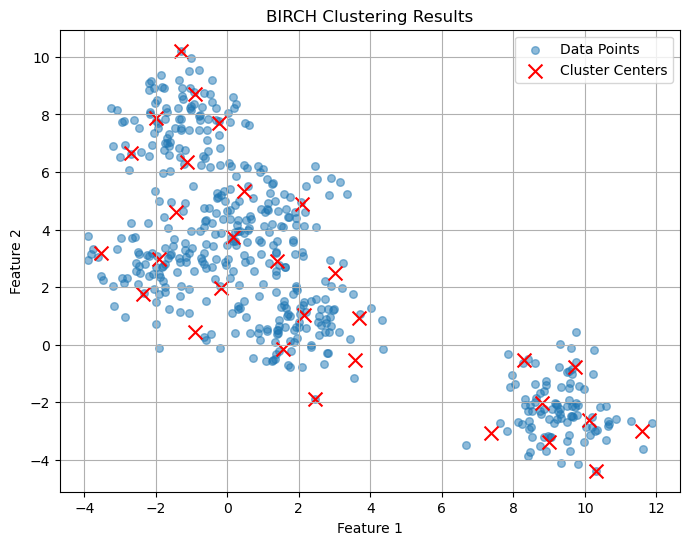

In [22]:
import csv
from collections import deque
import numpy as np
import matplotlib.pyplot as plt

class CF:
    def __init__(self, n_features):
        self.n_points = 0
        self.lin_sum = np.zeros(n_features)
        self.sqr_sum = np.zeros(n_features)

    def add(self, point):
        self.n_points += 1
        self.lin_sum += point
        self.sqr_sum += point ** 2

    @property
    def centroid(self):
        return self.lin_sum / self.n_points if self.n_points > 0 else None

    @property
    def variance(self):
        if self.n_points <= 1:
            return float('inf')
        return (self.sqr_sum - self.lin_sum ** 2 / self.n_points) / (self.n_points - 1)

    def distance(self, other):
        return np.linalg.norm(self.centroid - other.centroid)


class LeafNode:
    def __init__(self, threshold, branch_factor):
        self.threshold = threshold
        self.branch_factor = branch_factor
        self.cfs = []
        self.parent = None

    def add_cf(self, cf):
        closest_cf_index = min(range(len(self.cfs)), key=lambda i: self.cfs[i].distance(cf), default=None)
        if closest_cf_index is not None and self.cfs[closest_cf_index].distance(cf) < self.threshold:
            self.cfs[closest_cf_index].add(cf.lin_sum / cf.n_points)
        elif len(self.cfs) < self.branch_factor:
            self.cfs.append(cf)
        else:
            return False
        return True


class NonLeafNode:
    def __init__(self, branch_factor):
        self.branch_factor = branch_factor
        self.children = []
        self.parent = None

    def add_child(self, child_node):
        if len(self.children) >= self.branch_factor:
            raise ValueError("Cannot add more children to a non-leaf node")
        self.children.append(child_node)
        child_node.parent = self


class CFTree:
    def __init__(self, threshold=1.5, branch_factor=50):
        self.root = LeafNode(threshold, branch_factor)
        self.height = 1

    def insert(self, point):
        current_node = self.root
        while isinstance(current_node, NonLeafNode):
            distances = [child_node.cfs[0].distance(CF(point.shape[0]).add(point)) for child_node in current_node.children]
            nearest_child_index = np.argmin(distances)
            current_node = current_node.children[nearest_child_index]

        new_cf = CF(point.shape[0])
        new_cf.add(point)
        success = current_node.add_cf(new_cf)
        if not success:
            self.split_leaf(current_node, new_cf)

    def split_leaf(self, leaf_node, new_cf):
        cfs = sorted(leaf_node.cfs + [new_cf], key=lambda x: x.centroid[0])  # Sort by first feature
        new_leaf_node = LeafNode(leaf_node.threshold, leaf_node.branch_factor)
        leaf_node.cfs = cfs[:len(cfs)//2]
        new_leaf_node.cfs = cfs[len(cfs)//2:]

        parent_node = leaf_node.parent
        if parent_node is None:
            new_root = NonLeafNode(leaf_node.branch_factor)
            new_root.add_child(leaf_node)
            new_root.add_child(new_leaf_node)
            leaf_node.parent = new_root
            new_leaf_node.parent = new_root
            self.root = new_root
            self.height += 1
        else:
            parent_node.add_child(new_leaf_node)

    def get_clusters(self):
        clusters = []

        def traverse(node):
            if isinstance(node, LeafNode):
                for cf in node.cfs:
                    clusters.append(cf.centroid.tolist())
            else:
                for child in node.children:
                    traverse(child)

        traverse(self.root)
        return clusters


def read_csv(file_path):
    data = []
    with open(file_path, mode='r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header
        for row in reader:
            data.append([float(x) for x in row])
    return np.array(data)


def birch_clustering(file_path, threshold=1.5, branch_factor=50):
    data = read_csv(file_path)
    cf_tree = CFTree(threshold, branch_factor)
    for point in data:
        cf_tree.insert(point)
    return cf_tree.get_clusters(), data


def plot_clusters(clusters, data):
    clusters = np.array(clusters)
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], s=30, alpha=0.5, label='Data Points')
    plt.scatter(clusters[:, 0], clusters[:, 1], c='red', marker='x', s=100, label='Cluster Centers')
    plt.title('BIRCH Clustering Results')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()


# Example usage
if __name__ == "__main__":
    clusters, data = birch_clustering('cluster_data.csv')
    print("Clusters:", clusters)
    plot_clusters(clusters, data)





Means:
 [[-1.3217019   7.73520302]
 [ 4.83174629 -0.44527461]
 [-0.11745659  3.78354227]]
Covariances:
 [[[ 0.79011309  0.04758345]
  [ 0.04758345  0.97531211]]

 [[18.76792488 -7.21645717]
  [-7.21645717  3.76314456]]

 [[ 2.51358782  0.85074568]
  [ 0.85074568  1.48036002]]]
Weights:
 [0.19727526 0.4417635  0.36096125]


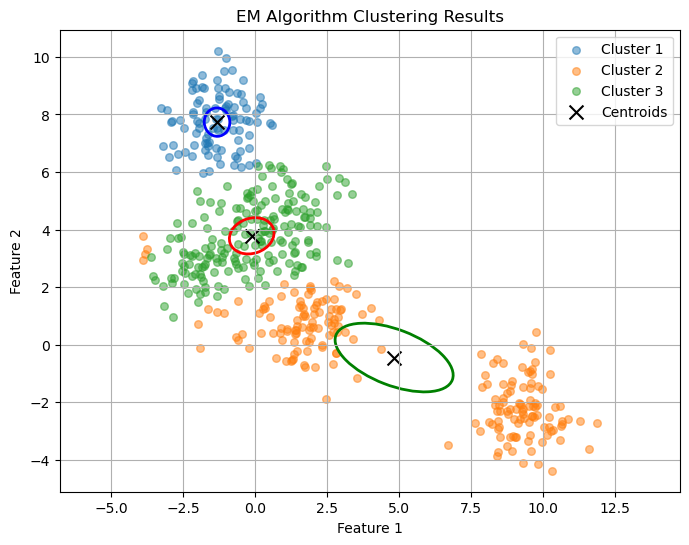

In [24]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

def read_csv(file_path):
    data = []
    with open(file_path, mode='r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header
        for row in reader:
            data.append([float(x) for x in row])
    return np.array(data)

def initialize_parameters(X, k):
    n_samples, n_features = X.shape
    means = X[np.random.choice(n_samples, k, replace=False)]
    covariances = [np.eye(n_features) for _ in range(k)]
    weights = np.ones(k) / k
    return means, covariances, weights

def gaussian_pdf(X, mean, covariance):
    n_features = len(mean)
    det_cov = np.linalg.det(covariance)
    inv_cov = np.linalg.inv(covariance)
    diff = X - mean
    exponent = -0.5 * np.sum(diff @ inv_cov * diff, axis=1)
    return (1.0 / (np.sqrt((2 * np.pi) ** n_features * det_cov))) * np.exp(exponent)

def e_step(X, means, covariances, weights):
    n_samples, n_clusters = len(X), len(means)
    responsibilities = np.zeros((n_samples, n_clusters))
    
    for i in range(n_clusters):
        responsibilities[:, i] = weights[i] * gaussian_pdf(X, means[i], covariances[i])
    
    sum_responsibilities = responsibilities.sum(axis=1).reshape(-1, 1)
    responsibilities /= sum_responsibilities
    
    return responsibilities

def m_step(X, responsibilities):
    n_samples, n_features = X.shape
    n_clusters = responsibilities.shape[1]
    
    weights = responsibilities.sum(axis=0) / n_samples
    means = np.dot(responsibilities.T, X) / responsibilities.sum(axis=0).reshape(-1, 1)
    
    covariances = np.empty((n_clusters, n_features, n_features))
    for i in range(n_clusters):
        diff = X - means[i]
        weighted_diff = diff * responsibilities[:, i].reshape(-1, 1)
        covariances[i] = np.dot(weighted_diff.T, diff) / responsibilities[:, i].sum()
    
    return means, covariances, weights

def em_algorithm(X, k, max_iter=100, tol=1e-4):
    means, covariances, weights = initialize_parameters(X, k)
    
    for iteration in range(max_iter):
        old_means = means.copy()
        
        responsibilities = e_step(X, means, covariances, weights)
        means, covariances, weights = m_step(X, responsibilities)
        
        if np.allclose(old_means, means, atol=tol):
            break
    
    return means, covariances, weights, responsibilities

def plot_clusters(means, covariances, weights, X, responsibilities):
    n_clusters = len(means)
    labels = np.argmax(responsibilities, axis=1)
    
    plt.figure(figsize=(8, 6))
    colors = ['blue', 'green', 'red', 'purple', 'orange']
    
    for i in range(n_clusters):
        cluster_points = X[labels == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=30, alpha=0.5, label=f'Cluster {i+1}')
        ellipse = Ellipse(means[i], width=np.sqrt(covariances[i][0, 0]), height=np.sqrt(covariances[i][1, 1]),
                          angle=np.degrees(np.arctan2(covariances[i][1, 0], covariances[i][0, 0])), color=colors[i], fill=False, linewidth=2)
        plt.gca().add_artist(ellipse)
    
    plt.scatter(means[:, 0], means[:, 1], c='black', marker='x', s=100, label='Centroids')
    plt.title('EM Algorithm Clustering Results')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()

# Example usage
if __name__ == "__main__":
    X = read_csv('cluster_data.csv')
    k = 3  # Number of clusters
    means, covariances, weights, responsibilities = em_algorithm(X, k)
    print("Means:\n", means)
    print("Covariances:\n", covariances)
    print("Weights:\n", weights)
    plot_clusters(means, covariances, weights, X, responsibilities)



